In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [2]:
gen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    shear_range = 0.3,
    rescale = 1.0 / 255.0
)

In [3]:
bbodol_cat_encoding = {
    0: 'Bbodol',
    1: 'Cat',
}

In [55]:
data_path = './bbodol_cat/'
batch_size = 2

data_gen = gen.flow_from_directory(
    directory = data_path,
    batch_size = batch_size,
    shuffle = True,
    target_size = (200, 200),
    class_mode = 'binary', # binary / categorical(one-hot) / sparse(십진수 형태)
)

Found 20 images belonging to 2 classes.


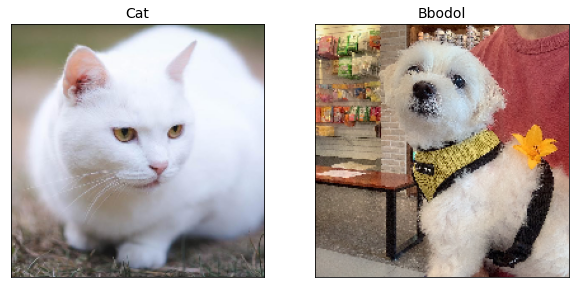

In [56]:
# sample
img, label = data_gen.next()
plt.figure(figsize=(10,10))

for i in range(len(label)):
    plt.subplot(1, len(label), i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.title(bbodol_cat_encoding[int(label[i])], fontsize=14)
    plt.imshow(img[i])

In [6]:
train_data = 5000

In [7]:
x_train = np.empty(shape=(train_data, 200, 200, 3), dtype=float)
y_train = np.empty(shape=(train_data, ), dtype=int)

In [8]:
for i in range(int(train_data/2)): # make 5,000 train data
    img, label = data_gen.next()
    x_train[2*i] = img[0]
    x_train[2*i+1] = img[1]
    
    y_train[2*i] = int(label[0])
    y_train[2*i+1] = int(label[1])

In [9]:
# CNN model 구축: 2 conv - pooling - dropout - flatten - hidden - dropout - output(binary)

# Feature Extractor
bbodol_cat_cnn = Sequential()
bbodol_cat_cnn.add(Conv2D(input_shape=(200,200,3), kernel_size=(3,3), filters=32, activation='relu', padding='same'))
bbodol_cat_cnn.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same'))
bbodol_cat_cnn.add(MaxPool2D(pool_size=(2,2)))
bbodol_cat_cnn.add(Dropout(0.25))

# Classifier
bbodol_cat_cnn.add(Flatten())
bbodol_cat_cnn.add(Dense(128, activation='sigmoid'))
bbodol_cat_cnn.add(Dropout(0.5))
bbodol_cat_cnn.add(Dense(1, activation='sigmoid'))

In [10]:
bbodol_cat_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
bbodol_cat_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [13]:
hist = bbodol_cat_cnn.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
40/40 [==============================] - 163s 4s/step - loss: 3.1325e-04 - accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 140s 4s/step - loss: 3.0410e-04 - accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 139s 3s/step - loss: 2.8412e-04 - accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 142s 4s/step - loss: 2.5764e-04 - accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 144s 4s/step - loss: 2.4718e-04 - accuracy: 1.0000


Found 10 images belonging to 2 classes.


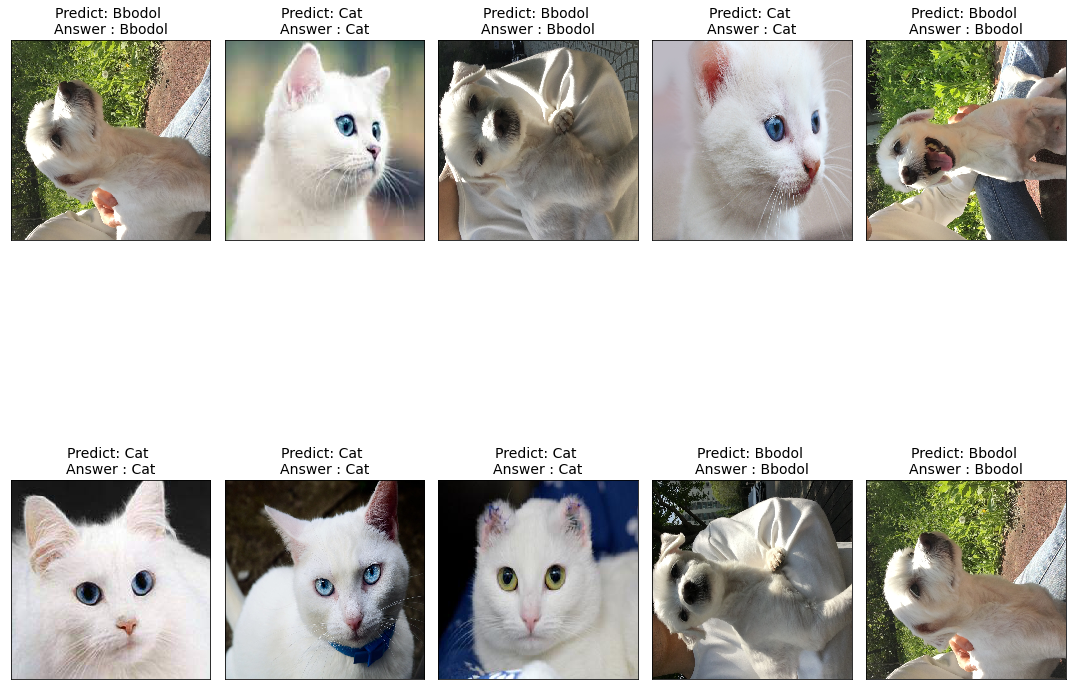

In [53]:
gen = ImageDataGenerator(rescale = 1.0 / 255.0)
data_path = './bbodol_cat_test/'
batch_size = 1

data_gen = gen.flow_from_directory(
    directory = data_path,
    batch_size = batch_size,
    target_size = (200, 200),
    shuffle=True,
    class_mode = 'binary', # binary / categorical(one-hot) / sparse(십진수 형태)
)


plt.figure(figsize=(15,15))

for i in range(10):
    # sample
    img, label = data_gen.next()
    
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    
    predict = 1 if bbodol_cat_cnn.predict(img) > 0.5 else 0

    plt.title("Predict: %s \nAnswer : %s" % (bbodol_cat_encoding[predict], bbodol_cat_encoding[int(label)]), fontsize=14)
    plt.imshow(img.reshape(200,200,3))
plt.tight_layout()